# Regression Modeling - Example

### imports

In [40]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder #for feature engineering
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# for evaluating ml models
from sklearn.metrics import mean_squared_error, mean_absolute_error 

### load csv

In [84]:
#loading the dataset
df=pd.read_csv("insurance.csv", sep=',')

## Descriptive Analysis

In [55]:
#first 5 rows
#  or df.head()
df[:5]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.88,0,no,northwest,3866.8552


#### Discovery and data quality

In [61]:
# checking the data types and null values
df.info()
print("############")
print("Tamanho do dataset:", len(df))
# 1338 clients

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       1338 non-null   int64 
 1   sex       1338 non-null   object
 2   bmi       1338 non-null   object
 3   children  1338 non-null   int64 
 4   smoker    1338 non-null   object
 5   region    1338 non-null   object
 6   charges   1338 non-null   object
dtypes: int64(2), object(5)
memory usage: 73.3+ KB
############
Tamanho do dataset: 1338


In [48]:
# checking the columns
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [85]:
# checking unique values - confirming if each datapoint is one customer
# there isn't an id in our dataset
# we could do: df['id'].nunique() == len(df)
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [86]:
# checking duplicate values
df.duplicated().value_counts()

False    1337
True        1
dtype: int64

In [87]:
# droping duplicate values
df.drop_duplicates(inplace=True)

In [88]:
# rows, columns
df.shape

# we have 1337 clients

(1337, 7)

In [67]:
# rows * columns
df.size

9359

#### Missing values

In [70]:
percentagem_na = pd.Series(df.isna().sum() / len(df))

#percentagem_na = percentagem_na[percentagem_na > 0.0]
#percentagem_na = percentagem_na.sort_values(ascending = False)

In [71]:
percentagem_na

# there aren't missing values

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

#### Outliers

#### Numerical

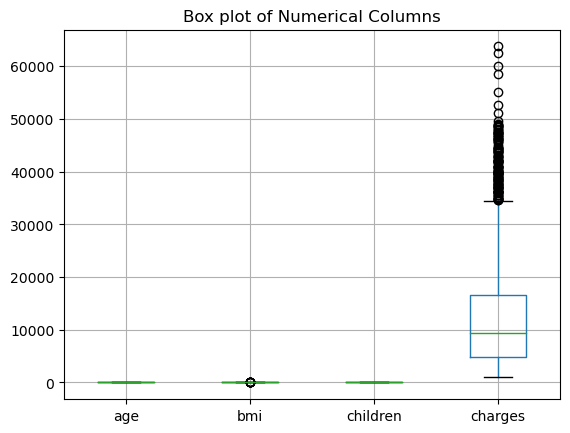

In [174]:
# Check for outliers
# Visualize box plots for numerical columns
df.boxplot(column=['age', 'bmi', 'children', 'charges'])
plt.title('Box plot of Numerical Columns')
plt.show()

In [175]:
# Handling outliers
# Remove outliers based on a specific threshold
df_cleaned = df[(df['charges'] < 21000)]

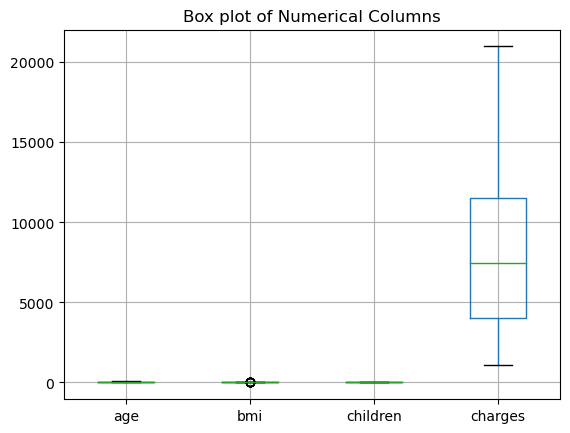

In [176]:
# visualize boxplot after removing outliers
df_cleaned.boxplot(column=['age', 'bmi', 'children', 'charges'])
plt.title('Box plot of Numerical Columns')
plt.show()

# there are also outliers in bmi

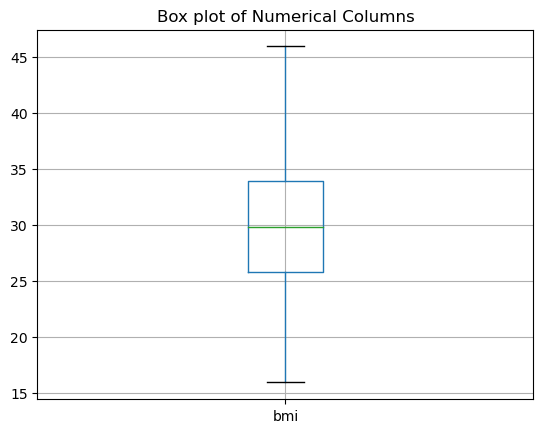

In [177]:
df_cleaned = df_cleaned[(df_cleaned['bmi'] < 46)]

# visualize boxplot after removing outliers
df_cleaned.boxplot(column=['bmi'])
plt.title('Box plot of Numerical Columns')
plt.show()

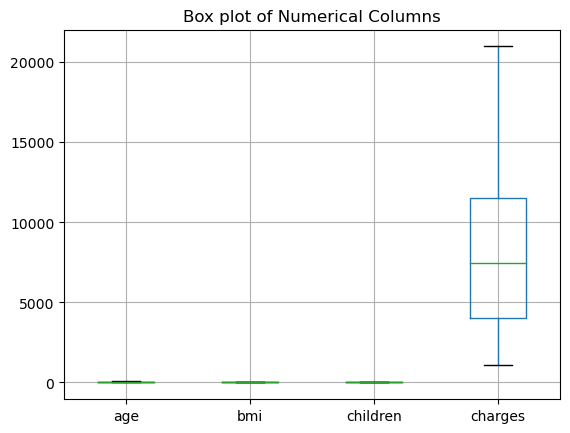

In [178]:
## Final
# visualize boxplot after removing outliers
df_cleaned.boxplot(column=['age', 'bmi', 'children', 'charges'])
plt.title('Box plot of Numerical Columns')
plt.show()

In [179]:
# Get summary statistics
df_cleaned.describe()

,age,bmi,children,charges
count,1068.000000,1068.000000,1068.000000,1068.000000
mean,38.371723,30.091910,1.076779,8159.150438
std,13.943164,5.856569,1.221375,4929.643963
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.840000,0.000000,4038.478863
50%,38.000000,29.830000,1.000000,7441.277000
75%,50.000000,33.933750,2.000000,11539.380487
max,64.000000,45.900000,5.000000,20984.093600


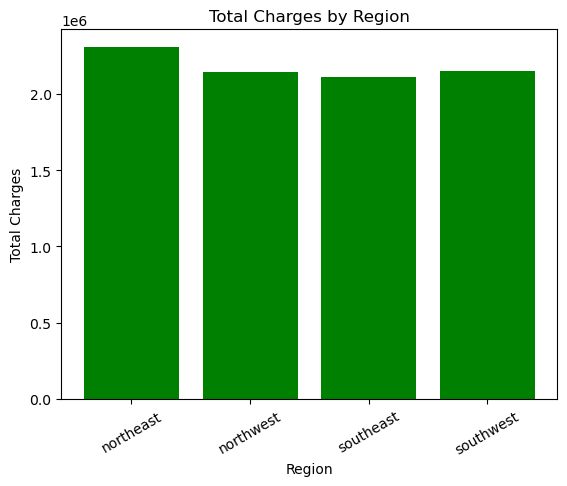

In [180]:
# Calculate the total charges by region
charges_region = df_cleaned.groupby('region')['charges'].sum()

# Create a bar chart
plt.bar(charges_region.index, charges_region.values, color='green')

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Charges')
plt.title('Total Charges by Region')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=30)

# Display the chart
plt.show()

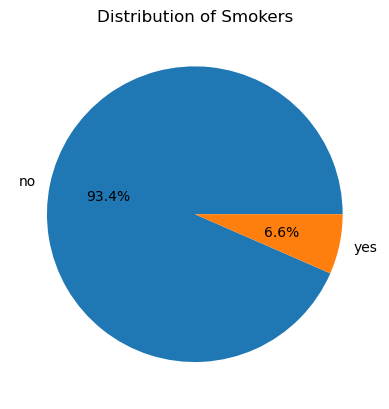

In [181]:
smoker_counts = df_cleaned['smoker'].value_counts()
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Smokers')
plt.show()

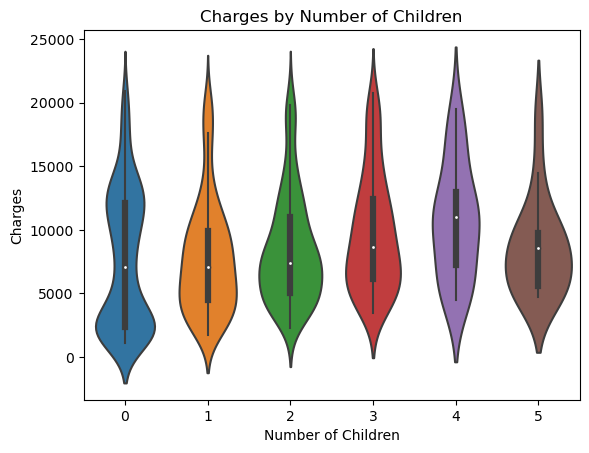

In [182]:
sns.violinplot(x=df_cleaned['children'], y=df_cleaned['charges'])
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.title('Charges by Number of Children')
plt.show()

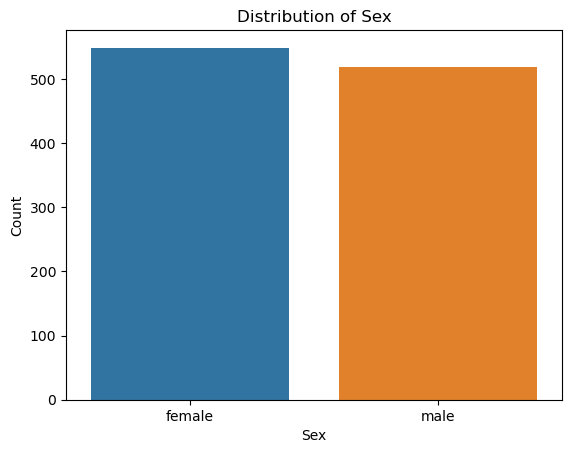

In [183]:
sns.countplot(x='sex', data=df_cleaned)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

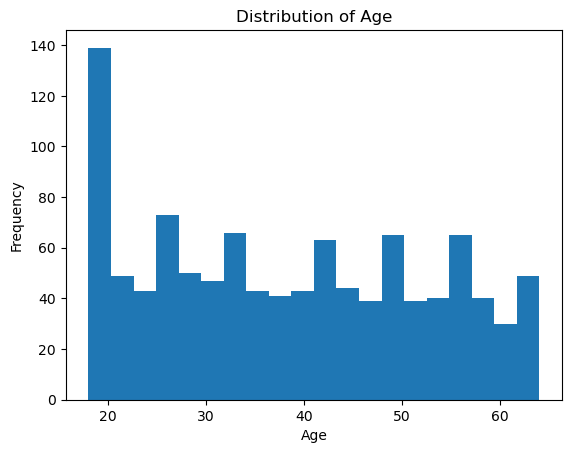

In [184]:
# distribution of age using histogram
df_cleaned['age'].plot(kind='hist', bins=20)
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.show()

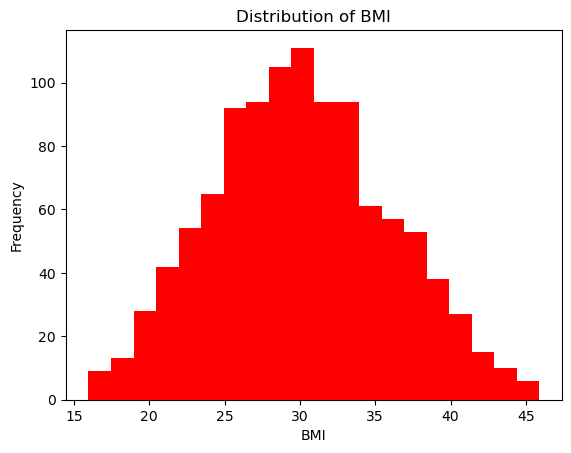

In [185]:
# distribution of BMI using histogram
df_cleaned['bmi'].plot(kind='hist', bins=20, color='r')
plt.xlabel('BMI')
plt.title('Distribution of BMI')
plt.show()

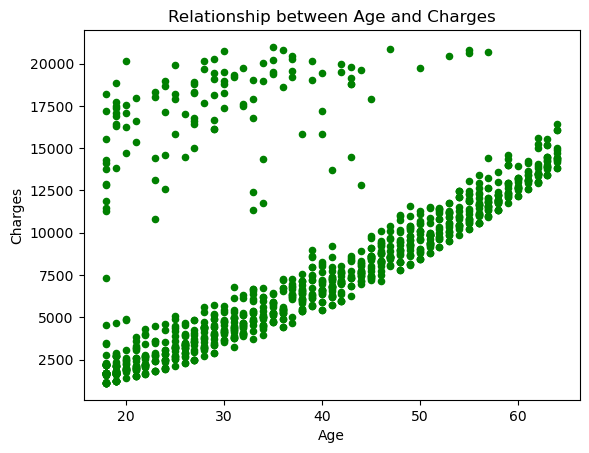

In [186]:
# relationship between age and charges using scatterplot
df_cleaned.plot(kind='scatter', x='age', y='charges', color='g')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relationship between Age and Charges')
plt.show()

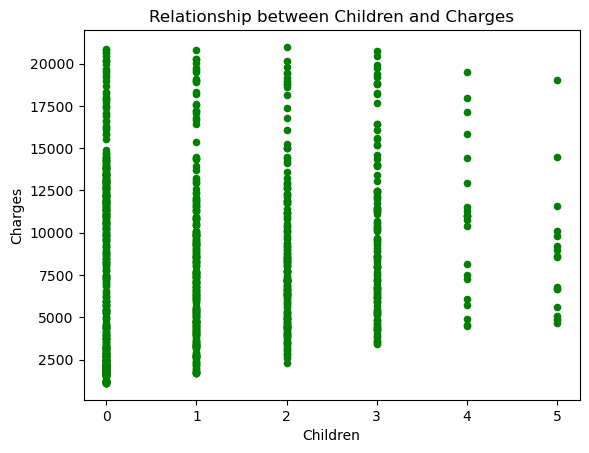

In [187]:
# relationship between age and charges using scatterplot
df_cleaned.plot(kind='scatter', x='children', y='charges', color='g')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.title('Relationship between Children and Charges')
plt.show()

### Feature Enginnering

##### Feature creation - bins

In [188]:
# Creating new feature such as Age groups
# we need to be careful with this because it performs as "distances" which is not totally incorrect.
# for example: seniors are more far away from young people than adults.
df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=[0, 25, 40, 60, df_cleaned['age'].max()], labels=['1', '2', '3', '4'])

In [189]:
# See if there are bmi below 25
df_cleaned.loc[df_cleaned['bmi'] < 25]
# min
#df_cleaned.loc[df_cleaned['bmi'] < 25].min()

,age,sex,bmi,children,smoker,region,charges,age_group
15,19,male,24.600,1,no,southwest,1837.23700,1
17,23,male,23.845,0,no,northeast,2395.17155,1
26,63,female,23.085,0,no,northeast,14451.83515,4
28,23,male,17.385,1,no,northwest,2775.19215,1
35,19,male,20.425,0,no,northwest,1625.43375,1
...,...,...,...,...,...,...,...,...
1295,20,male,22.000,1,no,southwest,1964.78000,1
1302,25,female,20.800,1,no,southwest,3208.78700,1
1306,29,female,21.850,0,yes,northeast,16115.30450,2
1314,30,female,23.655,3,yes,northwest,18765.87545,2


In [195]:
# Creating new feature such as BMI groups - according to Body Mass Index classification
df_cleaned['bmi_group'] = pd.cut(df_cleaned['bmi'], bins=[0, 25, 30, 35, 40, df_cleaned['bmi'].max()], labels=['0', '1', '2', '3', '4'])

In [196]:
df_cleaned[:5]

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group
0,19,female,27.90,0,yes,southwest,16884.9240,1,1
1,18,male,33.77,1,no,southeast,1725.5523,1,2
2,28,male,33.00,3,no,southeast,4449.4620,2,2
4,32,male,28.88,0,no,northwest,3866.8552,2,1
5,31,female,25.74,0,no,southeast,3756.6216,2,1


##### Feature encoding 

In [353]:
# Feature encoding - Handling categorical variables such as One-hot encoding for the 'region' column
df_encoded = pd.get_dummies(df_cleaned, columns=['region'], prefix='region')

# Label encoding for the 'smoker' column
label_encoder = LabelEncoder()
df_encoded['smoker_encoded'] = label_encoder.fit_transform(df_encoded['smoker'])
df_encoded['sex_encoded'] = label_encoder.fit_transform(df_encoded['sex'])

In [354]:
df_encoded[:5]

,age,sex,bmi,children,smoker,charges,age_group,bmi_group,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded,sex_encoded
0,19,female,27.90,0,yes,16884.9240,1,1,0,0,0,1,1,0
1,18,male,33.77,1,no,1725.5523,1,2,0,0,1,0,0,1
2,28,male,33.00,3,no,4449.4620,2,2,0,0,1,0,0,1
4,32,male,28.88,0,no,3866.8552,2,1,0,1,0,0,0,1
5,31,female,25.74,0,no,3756.6216,2,1,0,0,1,0,0,0


C:\Users\Bruna Simoes\AppData\Local\Temp\ipykernel_16108\3840923490.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_encoded.corr()


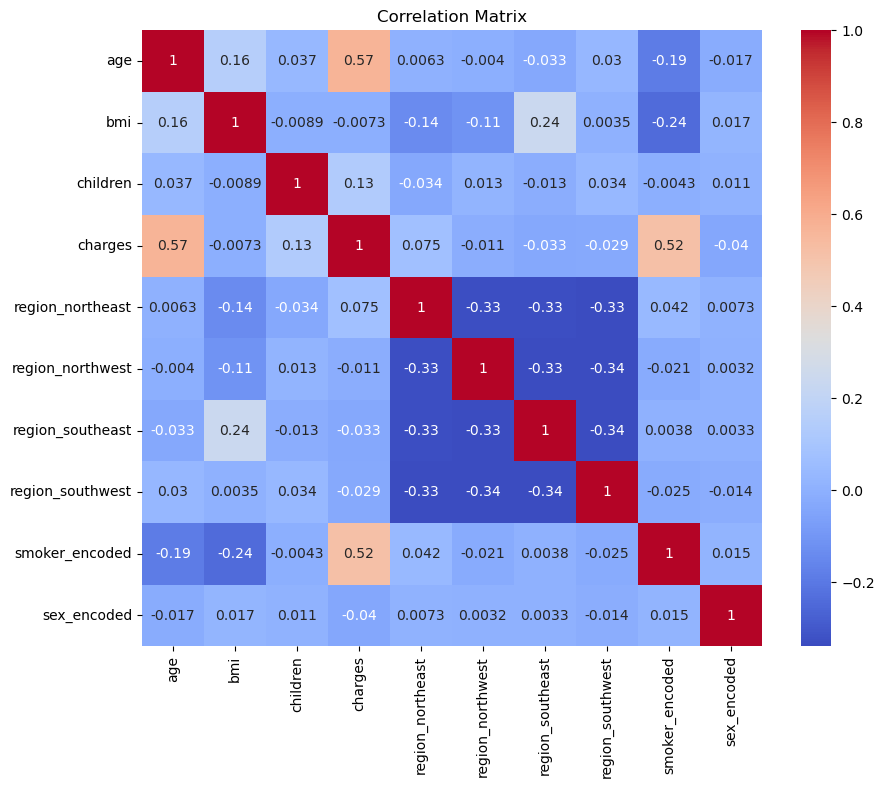

Relevant features based on correlation:
['age', 'smoker_encoded']


In [355]:
# Perform correlation analysis
corr_matrix = df_encoded.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Identify relevant features based on correlation
threshold = 0.3
relevant_features = corr_matrix[(corr_matrix['charges'].abs() > threshold) & (corr_matrix.index != 'charges')].index.tolist()
print("Relevant features based on correlation:")
print(relevant_features)

### Train / Test 

#### 1st Try with all variables

In [356]:
df_encoded[:5]

,age,sex,bmi,children,smoker,charges,age_group,bmi_group,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded,sex_encoded
0,19,female,27.90,0,yes,16884.9240,1,1,0,0,0,1,1,0
1,18,male,33.77,1,no,1725.5523,1,2,0,0,1,0,0,1
2,28,male,33.00,3,no,4449.4620,2,2,0,0,1,0,0,1
4,32,male,28.88,0,no,3866.8552,2,1,0,1,0,0,0,1
5,31,female,25.74,0,no,3756.6216,2,1,0,0,1,0,0,0


In [357]:
df_encoded.drop(['sex', 'bmi', 'smoker'], axis=1, inplace=True)
df_encoded

,age,children,charges,age_group,bmi_group,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded,sex_encoded
0,19,0,16884.9240,1,1,0,0,0,1,1,0
1,18,1,1725.5523,1,2,0,0,1,0,0,1
2,28,3,4449.4620,2,2,0,0,1,0,0,1
4,32,0,3866.8552,2,1,0,1,0,0,0,1
5,31,0,3756.6216,2,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1332,52,3,11411.6850,3,4,0,0,0,1,0,0
1333,50,3,10600.5483,3,2,0,1,0,0,0,1
1334,18,0,2205.9808,1,2,1,0,0,0,0,0
1335,18,0,1629.8335,1,3,0,0,1,0,0,0


In [358]:
df_encoded[['children', 'age_group','bmi_group', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'smoker_encoded', 'sex_encoded']] = (
    df_encoded[['children', 'age_group','bmi_group', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'smoker_encoded', 'sex_encoded']].apply(pd.to_numeric))

In [359]:
#For 2nd try
df_encoded.drop(['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest'], axis=1, inplace=True)
df_encoded

,age,children,charges,age_group,bmi_group,smoker_encoded,sex_encoded
0,19,0,16884.9240,1,1,1,0
1,18,1,1725.5523,1,2,0,1
2,28,3,4449.4620,2,2,0,1
4,32,0,3866.8552,2,1,0,1
5,31,0,3756.6216,2,1,0,0
...,...,...,...,...,...,...,...
1332,52,3,11411.6850,3,4,0,0
1333,50,3,10600.5483,3,2,0,1
1334,18,0,2205.9808,1,2,0,0
1335,18,0,1629.8335,1,3,0,0


In [360]:
#For 3rd try
df_encoded.drop(['children', 'bmi_group', 'sex_encoded'], axis=1, inplace=True)
df_encoded

,age,charges,age_group,smoker_encoded
0,19,16884.9240,1,1
1,18,1725.5523,1,0
2,28,4449.4620,2,0
4,32,3866.8552,2,0
5,31,3756.6216,2,0
...,...,...,...,...
1332,52,11411.6850,3,0
1333,50,10600.5483,3,0
1334,18,2205.9808,1,0
1335,18,1629.8335,1,0


In [361]:
# 4th try
df_encoded.drop(['age_group'], axis=1, inplace=True)
df_encoded

,age,charges,smoker_encoded
0,19,16884.9240,1
1,18,1725.5523,0
2,28,4449.4620,0
4,32,3866.8552,0
5,31,3756.6216,0
...,...,...,...
1332,52,11411.6850,0
1333,50,10600.5483,0
1334,18,2205.9808,0
1335,18,1629.8335,0


In [362]:
# with all features

# Select the relevant features
X = df_encoded[[feat for feat in df_encoded if feat not in ['charges']]]
y = df_encoded['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [363]:
print("Train_X:", len(X_train) / len(df))
print("Train_y:", len(y_train) / len(df))
print("Test_X:", len(X_test) / len(df))
print("Test_y:", len(y_test) / len(df))

Train_X: 0.6387434554973822
Train_y: 0.6387434554973822
Test_X: 0.1600598354525056
Test_y: 0.1600598354525056


In [364]:
X_train

,age,smoker_encoded
63,28,0
112,37,0
59,34,0
578,52,0
1154,48,0
...,...,...
797,30,0
148,53,0
127,52,0
139,22,0


In [365]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 854 entries, 63 to 1299
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             854 non-null    int64
 1   smoker_encoded  854 non-null    int32
dtypes: int32(1), int64(1)
memory usage: 16.7 KB


In [366]:
##
#In the first cycle of modelling, feature engineering is never done 
#(otherwise it could be wasted time and resources if solution already performs at a acceptable level)

In [367]:
# # Select the relevant features
# X = df_encoded[['age', 'smoker_encoded']]
# y = df_encoded['charges']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###### Linear Regression

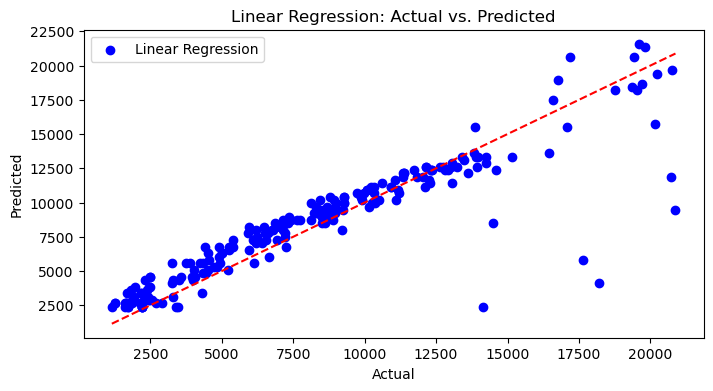

In [368]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)

# Plot actual vs. predicted values for Linear Regression
plt.figure(figsize=(8, 4))
plt.scatter(y_test, lr_predictions, color='blue', label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

###### Decision Tree

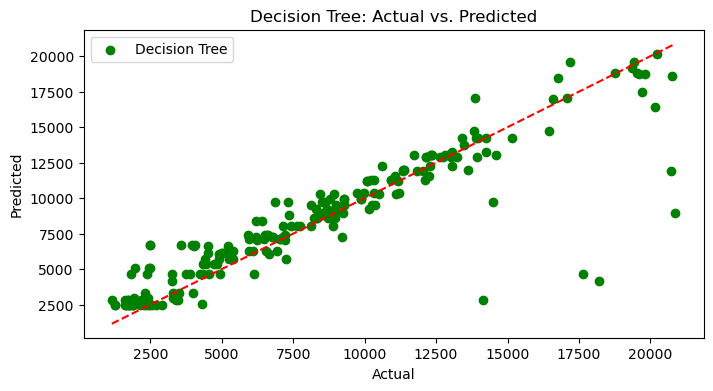

In [369]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)


# Plot actual vs. predicted values for Decision Tree
plt.figure(figsize=(8, 4))
plt.scatter(y_test, dt_predictions, color='green', label='Decision Tree')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Decision Tree: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

###### Random Forest

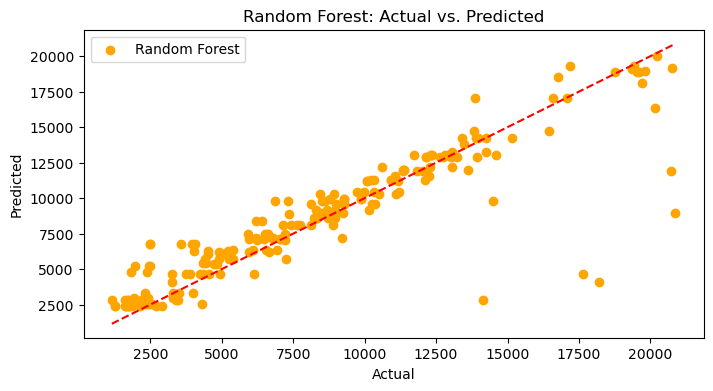

In [370]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)

# Plot actual vs. predicted values for Random Forest
plt.figure(figsize=(8, 4))
plt.scatter(y_test, rf_predictions, color='orange', label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Random Forest: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

###### Gradient Boosting

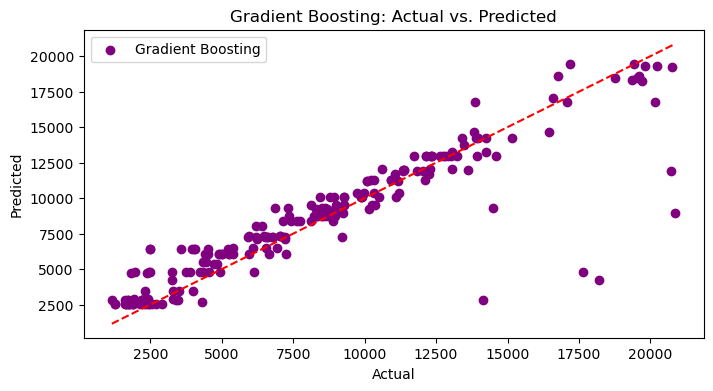

In [371]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)

# Plot actual vs. predicted values for Gradient Boosting
plt.figure(figsize=(8, 4))
plt.scatter(y_test, gb_predictions, color='purple', label='Gradient Boosting')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Gradient Boosting: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [372]:
# Print the evaluation metrics
print("Linear Regression - MSE: ", lr_mse)
print("Linear Regression - MAE: ", lr_mae)
print("Decision Tree - MSE: ", dt_mse)
print("Decision Tree - MAE: ", dt_mae)
print("Random Forest - MSE: ", rf_mse)
print("Random Forest - MAE: ", rf_mae)
print("Gradient Boosting - MSE: ", gb_mse)
print("Gradient Boosting - MAE: ", gb_mae)

Linear Regression - MSE:  4634314.049421767
Linear Regression - MAE:  1222.929243504623
Decision Tree - MSE:  4787974.830617759
Decision Tree - MAE:  1143.2991481582096
Random Forest - MSE:  4796587.652813473
Random Forest - MAE:  1141.5884230816255
Gradient Boosting - MSE:  4669802.905846265
Gradient Boosting - MAE:  1137.8143930724991


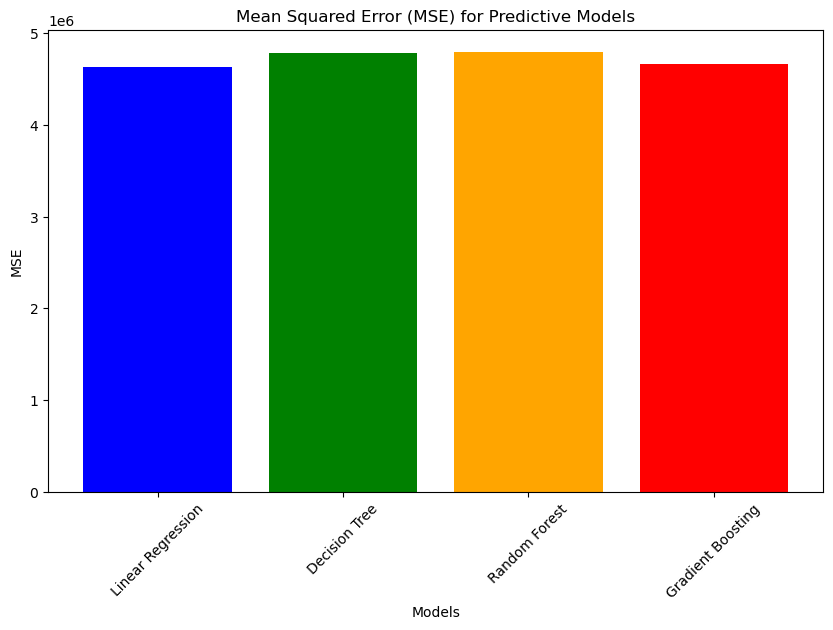

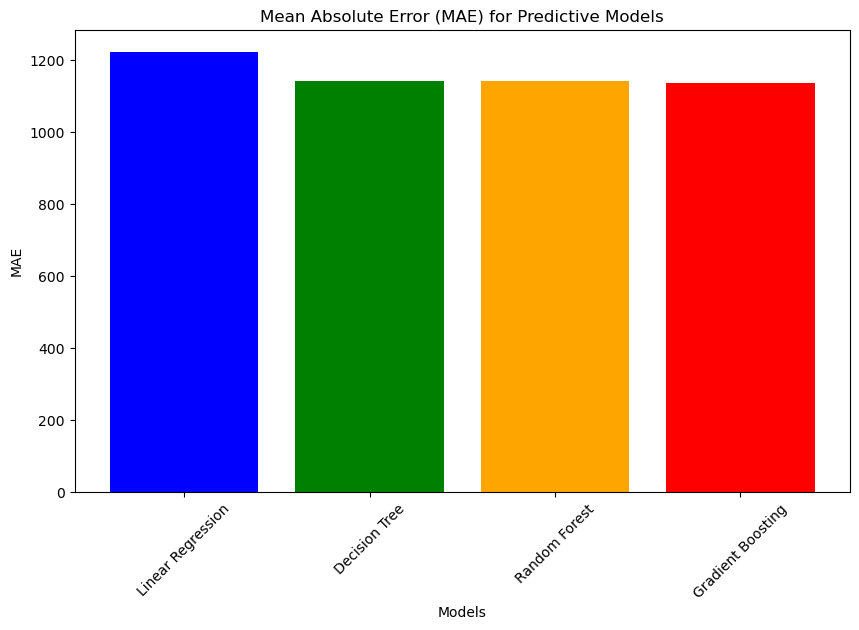

In [373]:
# MSE values
mse_values = [lr_mse, dt_mse, rf_mse, gb_mse]
# MAE values
mae_values = [lr_mae, dt_mae, rf_mae, gb_mae]

# Model names
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

# Specify colors for the bars
colors = ['blue', 'green', 'orange', 'red']

# Plot MSE values
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=colors)
plt.title('Mean Squared Error (MSE) for Predictive Models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.show()

# Plot MAE values
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, color=colors)
plt.title('Mean Absolute Error (MAE) for Predictive Models')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.show()

In [374]:
# Linear Regression
print("Linear Regression:")
print("Intercept:", lr_model.intercept_)
print("Coefficients:", lr_model.coef_)
print()

# Decision Tree
print("Decision Tree:")
# Feature importances
importance_dt = dt_model.feature_importances_
for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}")
print()

# Random Forest
print("Random Forest:")
# Feature importances
importance_rf = rf_model.feature_importances_
for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}")
print()

# Gradient Boosting
print("Gradient Boosting:")
# Feature importances
importance_gb = gb_model.feature_importances_
for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}")

Linear Regression:
Intercept: -1973.010446952222
Coefficients: [  243.31277454 12862.88472503]

Decision Tree:
age: 0.04974613617332383
smoker_encoded: 0.5586533830787181

Random Forest:
age: 0.04974613617332383
smoker_encoded: 0.5586533830787181

Gradient Boosting:
age: 0.04974613617332383
smoker_encoded: 0.5586533830787181


In [375]:
decision_tree_feature_importances

array([0.61712564, 0.38287436])

In [376]:
# Linear Regression
linear_regression_intercept =  lr_model.intercept_
linear_regression_coefficients = lr_model.coef_

# Features
features = list(X.columns)
# Values
values = [linear_regression_intercept] + linear_regression_coefficients

# Decision Tree
decision_tree_feature_importances = importance_dt

# Random Forest
random_forest_feature_importances = importance_rf

# Gradient Boosting
gradient_boosting_feature_importances = importance_gb


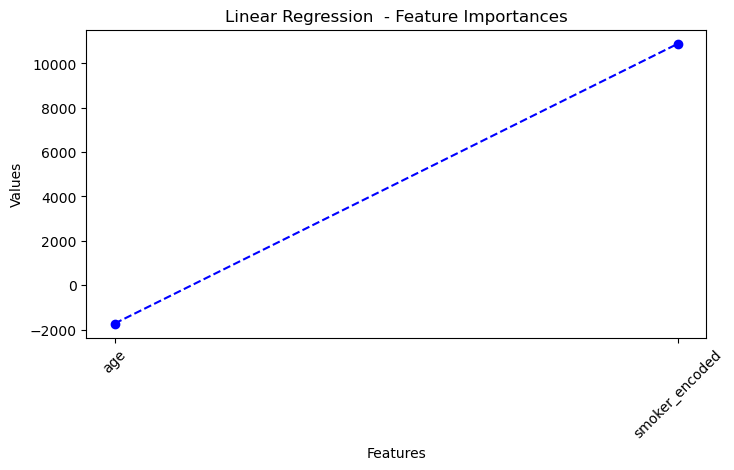

In [377]:
# Plot intercept and coefficients for Linear Regression
plt.figure(figsize=(8, 4))
plt.scatter(features, values, color='blue')
plt.plot(features, values, color='blue', linestyle='--')
plt.title('Linear Regression  - Feature Importances')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

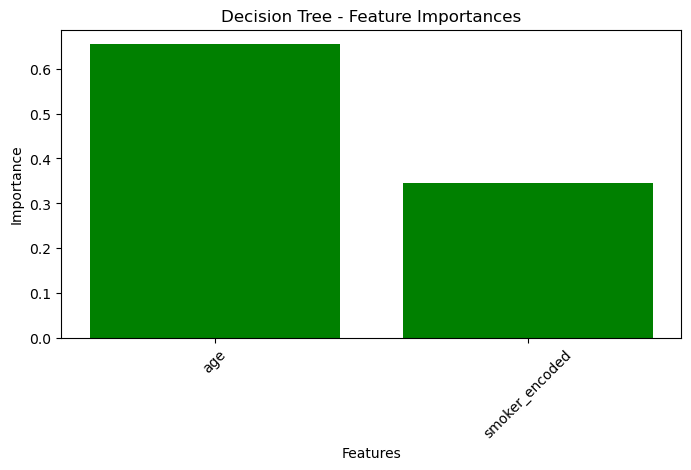

In [378]:
# Plot feature importances for Decision Tree
plt.figure(figsize=(8, 4))
plt.bar(features, decision_tree_feature_importances, color='green')
plt.title('Decision Tree - Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

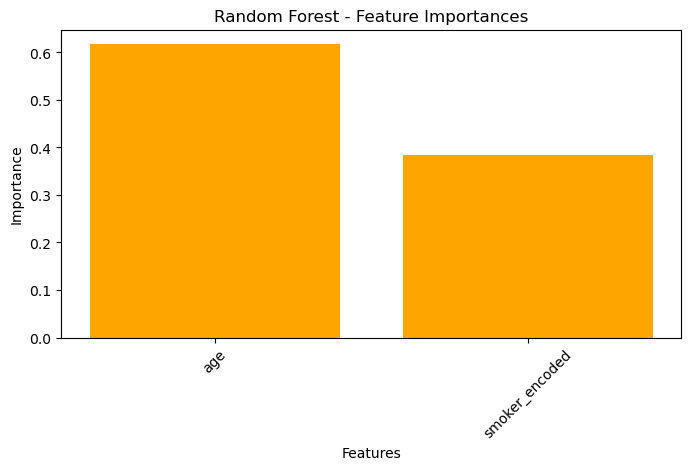

In [379]:
# Plot feature importances for Random Forest
plt.figure(figsize=(8, 4))
plt.bar(features, random_forest_feature_importances, color='orange')
plt.title('Random Forest - Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

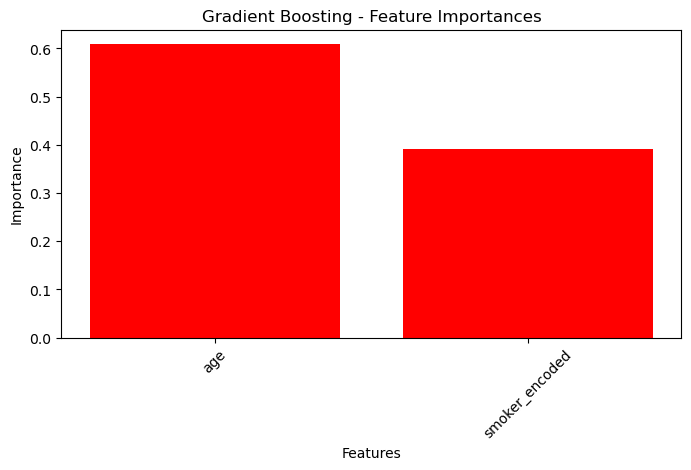

In [380]:
# Plot feature importances for Gradient Boosting
plt.figure(figsize=(8, 4))
plt.bar(features, gradient_boosting_feature_importances, color='red')
plt.title('Gradient Boosting - Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

In [382]:
# Example input for prediction
new_data = pd.DataFrame({ 'age': [20],
                         'smoker_encoded': [1],})

# Linear Regression
lr_predictions = lr_model.predict(new_data)
print("Linear Regression Predictions:", lr_predictions)

# Decision Tree
dt_predictions = dt_model.predict(new_data)
print("Decision Tree Predictions:", dt_predictions)

# Random Forest
rf_predictions = rf_model.predict(new_data)
print("Random Forest Predictions:", rf_predictions)

# Gradient Boosting
gb_predictions = gb_model.predict(new_data)
print("Gradient Boosting Predictions:", gb_predictions)


Linear Regression Predictions: [15756.12976883]
Decision Tree Predictions: [16397.5595375]
Random Forest Predictions: [16380.36273239]
Gradient Boosting Predictions: [16741.83805938]


In [383]:
# MSE values
mse_values = [lr_mse, dt_mse, rf_mse, gb_mse]
# MAE values
mae_values = [lr_mae, dt_mae, rf_mae, gb_mae]

models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

# Find the index of the minimum MSE
min_mse_index = mse_values.index(min(mse_values))
# Find the index of the minimum MAE
min_mae_index = mae_values.index(min(mae_values))

# Get the best model based on MSE
best_model_mse = models[min_mse_index]
best_mse = mse_values[min_mse_index]

# Get the best model based on MAE
best_model_mae = models[min_mae_index]
best_mae = mae_values[min_mae_index]

# Print the best model based on MSE and MAE
print("Best Model based on MSE: ", best_model_mse)
print("MSE: ", best_mse)
print("Best Model based on MAE: ", best_model_mae)
print("MAE: ", best_mae)

Best Model based on MSE:  Linear Regression
MSE:  4634314.049421767
Best Model based on MAE:  Gradient Boosting
MAE:  1137.8143930724991


###### 1st try -- features= 'children', 'age_group','bmi_group', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'smoker_encoded', 'sex_encoded'
Best Model based on MSE:  Gradient Boosting
<br> MSE:  6171768.929447067
<br> Best Model based on MAE:  Gradient Boosting
<br> MAE:  1579.9487680143498


###### 2nd try -- features= 'children', 'age_group','bmi_group', 'smoker_encoded', 'sex_encoded'
Best Model based on MSE:  Gradient Boosting
<br> MSE:  6224966.3493768
<br> Best Model based on MAE:  Gradient Boosting
<br> MAE:  1592.671688890535

###### 3rd try -- features=  'age_group', 'smoker_encoded', 
Best Model based on MSE:  Random Forest
<br> MSE:  6249255.0690625785
<br> Best Model based on MAE:  Random Forest
<br> MAE:  1681.4446448745814


###### 4th try --features = 'age', 'smoker_encoded', 
Best Model based on MSE:  Linear Regression
<br> MSE:  4634314.049421767
<br> Best Model based on MAE:  Gradient Boosting
<br> MAE:  1137.8143930724991